# _CalCOFI dataset Regression Analysis_

The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature. 

The California Cooperative Oceanic Fisheries Investigations (CalCOFI) conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity. 

This Analysis is done to figure out a relation between the temperature and salinity of water in ocean.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('calcofi/bottle.csv', low_memory=False)

## * _Data Preprocessing to get only the useful data out of the whole dataset._

In [3]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(864863, 74)

In [5]:
data.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [6]:
data.isna().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
T_degC                  10963
Salnty                  47354
O2ml_L                 168662
STheta                  52689
O2Sat                  203589
Oxy_µmol/Kg            203595
BtlNum                 746196
RecInd                      0
T_prec                  10963
T_qual                 841736
S_prec                  47354
S_qual                 789949
P_qual                 191108
O_qual                 680187
SThtaq                 799040
O2Satq                 647066
ChlorA                 639591
Chlqua                 225697
Phaeop                 639592
Phaqua                 225693
PO4uM                  451546
PO4q                   413077
SiO3uM                 510772
SiO3qu                 353997
NO2uM                  527287
                        ...  
MeanAs                 842213
MeanAp                 844406
MeanAq    

In [7]:
data = data[['T_degC','Salnty']]

In [8]:
data.head()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [9]:
data.rename(columns={'T_degC':'temp','Salnty':'sal'}, inplace=True)

In [10]:
data.head()

,temp,sal
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [11]:
data.shape

(864863, 2)

In [12]:
data.dropna(inplace=True)

In [13]:
data.shape

(814247, 2)

In [14]:
data.isna().sum()

temp    0
sal     0
dtype: int64

In [15]:
data.dtypes

temp    float64
sal     float64
dtype: object

In [16]:
data = data[:1000]

In [17]:
data.shape

(1000, 2)

In [18]:
data.head()

,temp,sal
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [19]:
# data['sal'].max()

## * _Dividing the data into parts for training and testing_

In [20]:
X = data.iloc[:,:-1].values

In [21]:
y = data.iloc[:,1].values

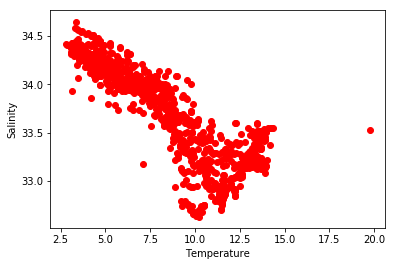

In [22]:
# X = np.array(X).reshape(-1,1)
# y = np.array(y).reshape(-1,1)

plt.scatter(X, y, color='red')
plt.xlabel('Temperature')
plt.ylabel('Salinity')
plt.show()

In [23]:
type(X)

numpy.ndarray

In [24]:
type(y)

numpy.ndarray

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##  * _Fitting the Regression model using sklearn_

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
regressor = LinearRegression()

In [31]:
X_poly

array([[1.00000000e+00, 1.04700000e+01, 1.09620900e+02, 1.14773082e+03],
       [1.00000000e+00, 6.45000000e+00, 4.16025000e+01, 2.68336125e+02],
       [1.00000000e+00, 7.22000000e+00, 5.21284000e+01, 3.76367048e+02],
       ...,
       [1.00000000e+00, 7.21000000e+00, 5.19841000e+01, 3.74805361e+02],
       [1.00000000e+00, 1.34400000e+01, 1.80633600e+02, 2.42771558e+03],
       [1.00000000e+00, 1.22300000e+01, 1.49572900e+02, 1.82927657e+03]])

In [32]:
regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
accuracy = regressor.score(poly_reg.transform(X_test), y_test)

In [34]:
accuracy

0.7867952572831919

## * _Visualizing the data._

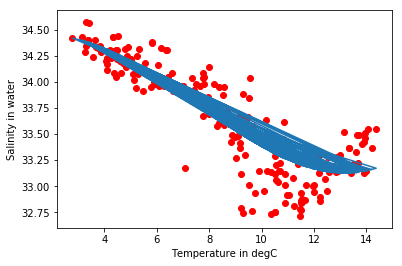

In [36]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, regressor.predict(poly_reg.transform(X_test)))
plt.xlabel('Temperature in degC')
plt.ylabel('Salinity in water')
plt.show()